In [538]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from scipy.stats import ttest_ind , stats



Import and Disply dataset:

In [539]:
df = pd.read_csv('marketing_data.csv')

In [540]:
df.shape

(2240, 28)

In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [542]:
df.head()


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [543]:
df.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND
2239,4070,1969,PhD,Married,"$94,871.00",0,2,9/1/12,99,169,...,4,7,0,1,1,0,0,1,0,CA


In [544]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [545]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

**Cleaning**:

In [546]:
df.rename(columns={' Income ':'Income'},inplace=True)

In [547]:
df['Income'] = df['Income'].str.replace(',', '').str.replace('$', '').astype(float)


<ipython-input-547-2e2afe66e04f>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace(',', '').str.replace('$', '').astype(float)


In [548]:
df.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [549]:

df['Marital_Status'] = df['Marital_Status'].apply(lambda x: 'couple' if x in ['Married', 'Together'] else 'Alone')



In [550]:
missing_income = df['Income'].isnull()
df['Income'] = df.groupby(['Education', 'Marital_Status'])['Income'].transform(lambda x: x.fillna(x.mean()))
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Alone,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Alone,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,couple,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,couple,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Alone,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Alone,66476.0,0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,couple,31056.0,1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Alone,46310.0,1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,couple,65819.0,0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [551]:
df.isnull(). sum()


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [552]:
df['Age'] = 2023 - df['Year_Birth']
df['Total_spending'] = df.loc[:,df.columns.str.startswith('Mnt')].sum(axis=1)
df['Children']= df['Kidhome'] + df['Teenhome']
df['Total_Purchases']= df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age,Total_spending,Children,Total_Purchases
0,1826,1970,Graduation,Alone,84835.0,0,0,6/16/14,0,189,...,0,0,0,1,0,SP,53,1190,0,15
1,1,1961,Graduation,Alone,57091.0,0,0,6/15/14,0,464,...,0,0,1,1,0,CA,62,577,0,18
2,10476,1958,Graduation,couple,67267.0,0,1,5/13/14,0,134,...,0,0,0,0,0,US,65,251,1,11
3,1386,1967,Graduation,couple,32474.0,1,1,5/11/14,0,10,...,0,0,0,0,0,AUS,56,11,2,4
4,5371,1989,Graduation,Alone,21474.0,1,0,4/8/14,0,6,...,0,0,0,1,0,SP,34,91,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Alone,66476.0,0,1,3/7/13,99,372,...,0,0,0,0,0,US,47,689,1,20
2236,5263,1977,2n Cycle,couple,31056.0,1,0,1/22/13,99,5,...,0,0,0,0,0,SP,46,55,1,5
2237,22,1976,Graduation,Alone,46310.0,1,0,12/3/12,99,185,...,0,0,0,0,0,SP,47,309,1,14
2238,528,1978,Graduation,couple,65819.0,0,0,11/29/12,99,267,...,0,0,0,0,0,IND,45,1383,0,20


In [553]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age',
       'Total_spending', 'Children', 'Total_Purchases'],
      dtype='object')

### **Visualization**

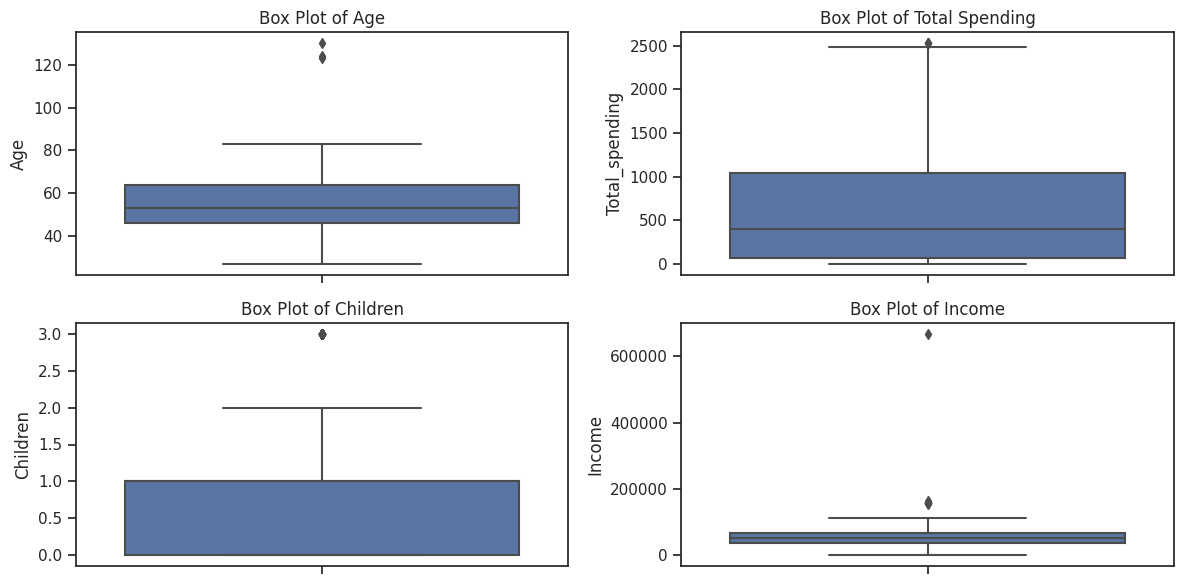

In [554]:
to_use_plots = ['Age','Total_spending', 'Children','Income']
subset_df = df[to_use_plots]

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(data=subset_df, y='Age')
plt.title('Box Plot of Age')

plt.subplot(2, 2, 2)
sns.boxplot(data=subset_df, y='Total_spending')
plt.title('Box Plot of Total Spending')

plt.subplot(2, 2, 3)
sns.boxplot(data=subset_df, y='Children')
plt.title('Box Plot of Children')

plt.subplot(2, 2, 4)
sns.boxplot(data=subset_df, y='Income')
plt.title('Box Plot of Income')

plt.tight_layout()
plt.show()


**Outlayers hndling:**

In [555]:
df.drop(df[df['Age'] > 90].index, inplace=True)
df.drop(df.loc[df['Children'] > 2].index, inplace=True)
# df.drop(df.loc[df['Income'] > 300000].index, inplace=True)


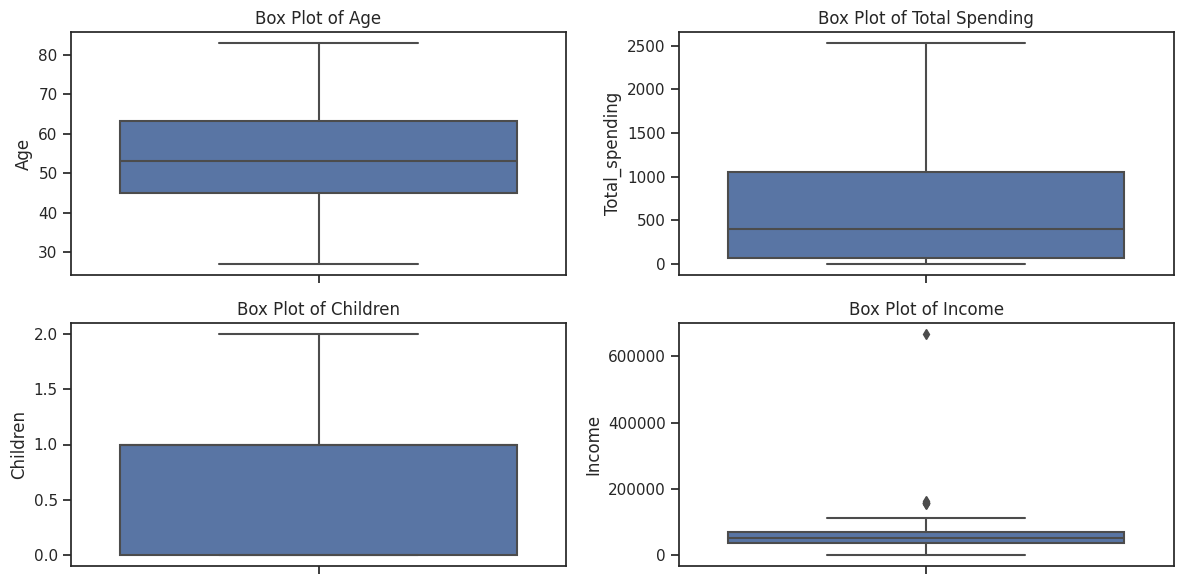

In [556]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.boxplot(data=df, y='Age')
plt.title('Box Plot of Age')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, y='Total_spending')
plt.title('Box Plot of Total Spending')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, y='Children')
plt.title('Box Plot of Children')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, y='Income')
plt.title('Box Plot of Income')

plt.tight_layout()
plt.show()

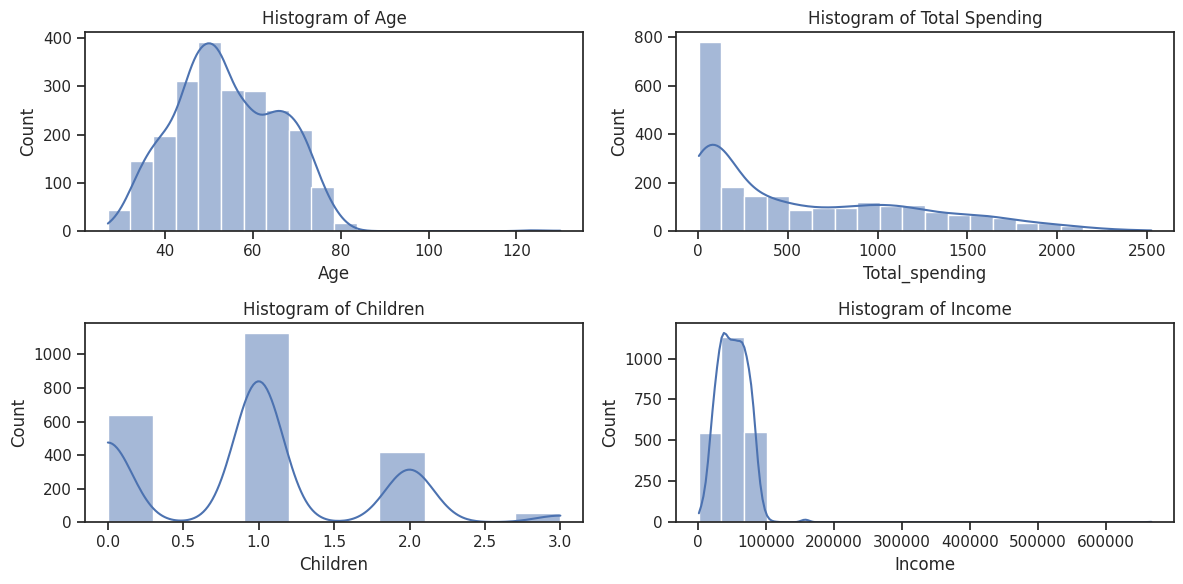

In [557]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(data=subset_df, x='Age', bins=20, kde=True)
plt.title('Histogram of Age')

plt.subplot(2, 2, 2)
sns.histplot(data=subset_df, x='Total_spending', bins=20, kde=True)
plt.title('Histogram of Total Spending')

plt.subplot(2, 2, 3)
sns.histplot(data=subset_df, x='Children', bins=10, kde=True)
plt.title('Histogram of Children')

plt.subplot(2, 2, 4)
sns.histplot(data=subset_df, x='Income', bins=20, kde=True)
plt.title('Histogram of Income')

plt.tight_layout()
plt.show()


In [558]:
df.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [559]:
df['Education']=df['Education'].replace({'Basic' : 1 ,'2n Cycle' : 2 , 'Graduation': 3 , 'Master': 4 , 'PhD': 5})


In [560]:
df['Education'].unique()

array([3, 5, 2, 4, 1])

In [561]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

In [562]:
#df['Country']=df['Country'].replace({'SP' : 10 ,'CA' : 20 , 'US': 30 , 'AUS': 40 , 'GER': 50 ,'IND': 60 , 'SA': 70 , 'ME': 80 })


In [563]:
df['Country'].unique()

array(['SP', 'CA', 'US', 'AUS', 'GER', 'IND', 'SA', 'ME'], dtype=object)

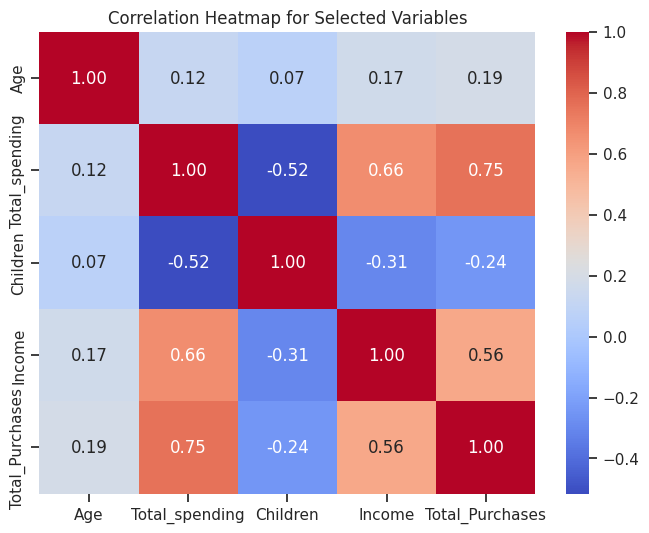

In [564]:
to_use_plots = ['Age', 'Total_spending', 'Children', 'Income','Total_Purchases']
subset_df = df[to_use_plots]

correlation_matrix = subset_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Selected Variables')
plt.show()


## 1th Hypothesis

In [565]:
store = df.loc[df['Age']>60,'NumStorePurchases']
web = df.loc[df['Age']>60,'NumWebPurchases']

In [566]:
stats.ttest_ind(store , web , alternative='greater')

<ipython-input-566-0cd0502e6ba1>:1: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_ind(store , web , alternative='greater')


TtestResult(statistic=12.137955682186766, pvalue=1.5266670069186515e-32, df=1340.0)

 ## we will reject it

## 2th Hypothesis

In [567]:
store1 = df.loc[df['Children']>=1,'NumStorePurchases']
web1 = df.loc[df['Children']>=1,'NumWebPurchases']

In [568]:
stats.ttest_ind(store1 , web1 , alternative='greater')

<ipython-input-568-b82f8b10f409>:1: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_ind(store1 , web1 , alternative='greater')


TtestResult(statistic=11.640049930444635, pvalue=5.572223545095601e-31, df=3092.0)

 ## we will reject it

## 3th Hypothesis

In [569]:
other = df.loc[:,['NumCatalogPurchases','NumWebPurchases']].sum(axis=1)
store3 = df.loc[:,'NumStorePurchases']

In [570]:
stats.ttest_ind(other , store3 , alternative='greater')

<ipython-input-570-51dcb29c7dbd>:1: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_ind(other , store3 , alternative='greater')


TtestResult(statistic=7.949791676015332, pvalue=1.1800014676113128e-15, df=4366.0)

 ## we will reject it

## 4th Hypothesis

In [571]:
us = df.loc[df['Country']==30,'Total_Purchases']
otherC = df.loc[df['Country']!=30,'Total_Purchases']

In [572]:
stats.ttest_ind(us , otherC , alternative='greater')

<ipython-input-572-9b79d78ff97c>:1: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.ttest_ind(us , otherC , alternative='greater')


TtestResult(statistic=nan, pvalue=nan, df=nan)

 ## we will Accept it

In [573]:
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Age',
       'Total_spending', 'Children', 'Total_Purchases'],
      dtype='object')

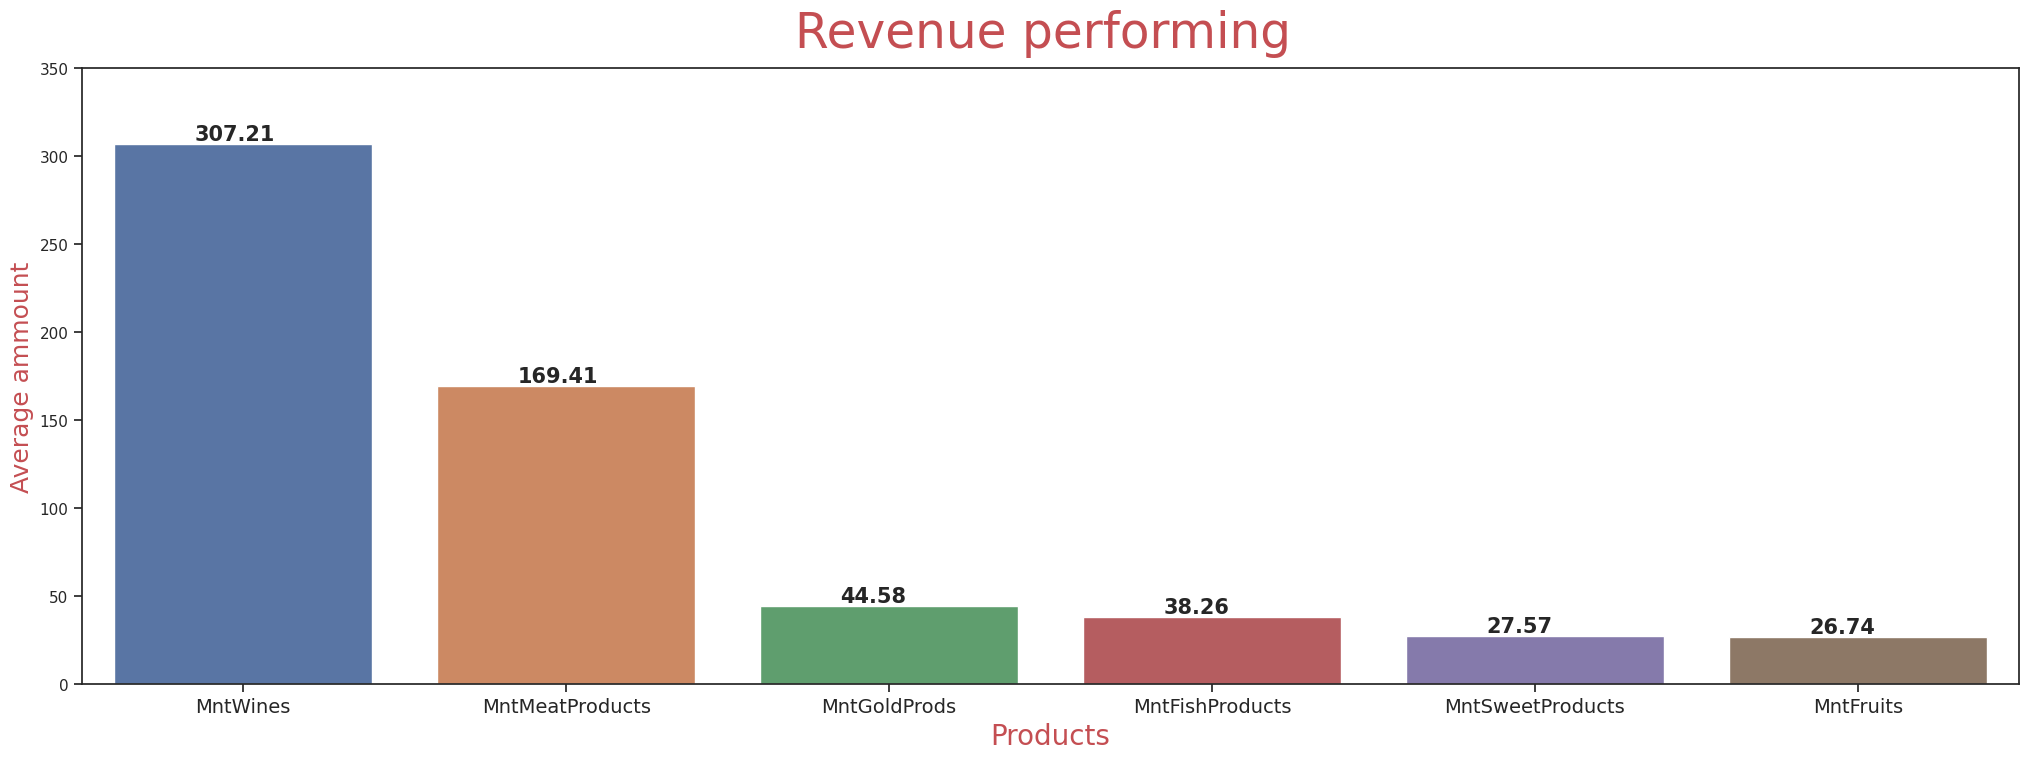

In [574]:
products_data = df.loc[:,df.columns.str.startswith('Mnt')].mean().round(2).sort_values(ascending=False)

plt.figure(figsize=(25 , 8))
sns.barplot(x = products_data.index , y = products_data.values , order= products_data.index)
for i in range(products_data.size):
  plt.annotate(products_data[i], xy = (i-0.15, products_data[i]+2) , size=15 , weight= "heavy")

plt.ylim(0 , 350)
plt.xlabel('Products' , size= 20 , color='r')
plt.ylabel('Average ammount', size= 18 , color='r')
plt.title('Revenue performing ', size= 35 , pad = 15 , color='r')
plt.xticks(size = 14)
plt.show()


In [575]:
accepted_cus = df.groupby('Country')[['AcceptedCmp5']].agg('sum').squeeze().sort_values(ascending=False)

accepted_cus.drop('ME' , inplace=True)
accepted_cus


Country
SP     88
SA     21
CA     20
AUS    13
GER     8
IND     6
US      5
Name: AcceptedCmp5, dtype: int64

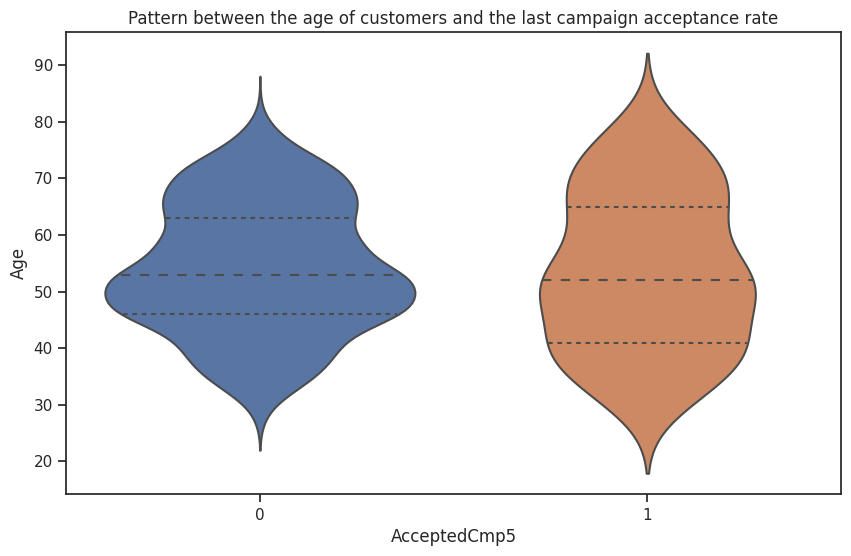

In [576]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='AcceptedCmp5', y='Age', data=df, inner='quartile')
plt.xlabel('AcceptedCmp5')
plt.ylabel('Age')
plt.title('Pattern between the age of customers and the last campaign acceptance rate')
plt.show()

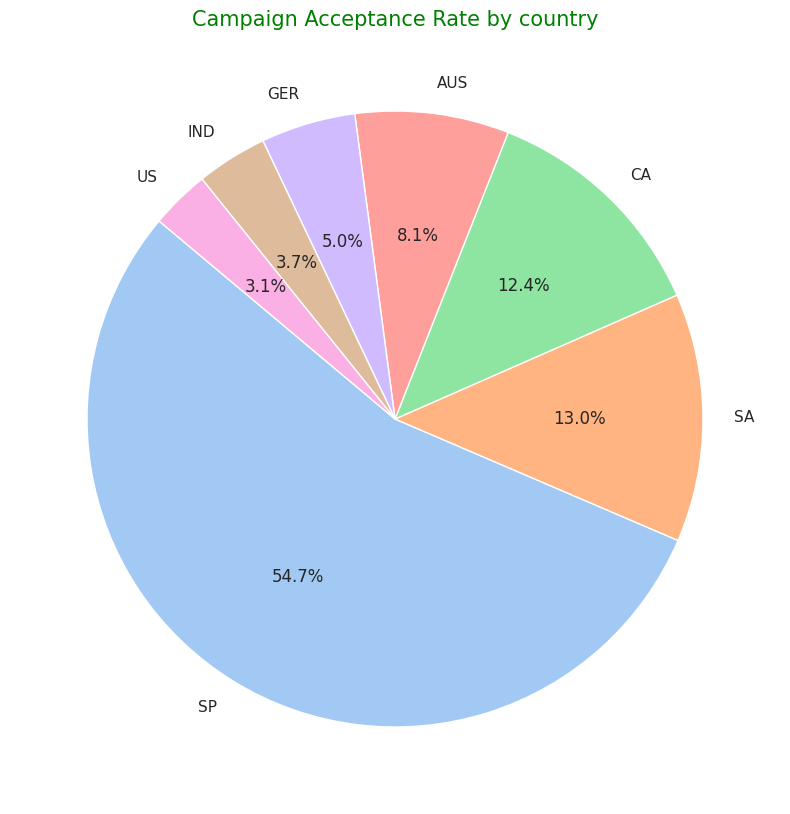

In [577]:

# Set up the pie chart
plt.figure(figsize=(10, 10))
plt.pie(accepted_cus, labels=accepted_cus.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

plt.title('Campaign Acceptance Rate by country', size=15, color='green')
plt.show()

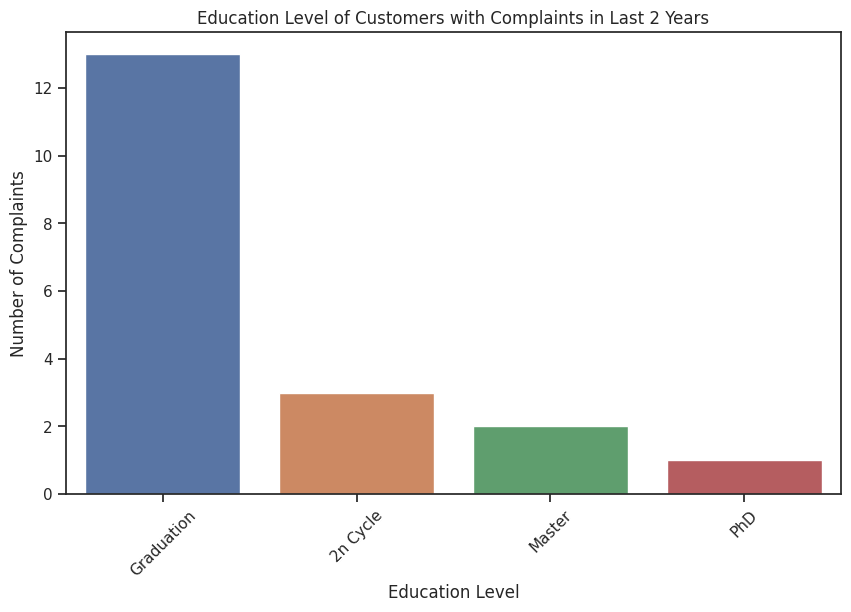

In [579]:
df['Education']=df['Education'].replace({ 1 : 'Basic' , 2 : '2n Cycle' , 3 : 'Graduation' , 4 : 'Master' , 5 : 'PhD'})

complained_customers = df[df['Complain'] == 1]

complaints_by_education = complained_customers['Education'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=complaints_by_education.index, y=complaints_by_education.values)
plt.xlabel('Education Level')
plt.ylabel('Number of Complaints')
plt.title('Education Level of Customers with Complaints in Last 2 Years')
plt.xticks(rotation=45)
plt.show()